In [1]:
import tweepy as tw
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nitin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nitin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
consumer_key = 'mGsFf8tqL8sLLmkgvVvE3HPjN'
consumer_secret = 'q5QSXYDM8nxkJHv8TeSlXkWY2MfLDMEPWkqa8bSFNB6MNhEnmH'
access_token = '1133675761141862400-Ur7UvngZcvdg5h4WIumm0IS3z31Off'
access_token_secret = 'lEDEJK96jKvXmOjvY63ZnoMabelGTPxrMtID7xJl8ByB5'

In [3]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [4]:
# search keyword to fetch tweets
search_word = "agneepath"+" -filter:retweets"
date_since = "2022-06-20"

In [5]:
# Collecting tweets
tweets = tw.Cursor(api.search_tweets, q=search_word, lang="hi-IN", since=date_since).items(500)

In [6]:
# for tweet in tweets:
#     print(tweet)

In [7]:
# making list of required info
twt_list=[[tweet.user.screen_name, tweet.text,tweet.user.followers_count, tweet.created_at] for tweet in tweets]
twt_list

Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since


[['SomeGuyKK',
  "Kya mast start Hui hai din ki\nWatching Hrithik Roshan's Agneepath",
  124,
  datetime.datetime(2022, 7, 7, 6, 6, 57, tzinfo=datetime.timezone.utc)],
 ['TimesDastak',
  'अग्निपथ योजना: IAF को मिले रिकॉर्ड आवेदन, फिर भी अनेकों युवा\xa0नाखुश https://t.co/qgEx21ermx',
  217,
  datetime.datetime(2022, 7, 7, 4, 24, 32, tzinfo=datetime.timezone.utc)],
 ['TimesDastak',
  'अग्निपथ योजना: IAF को मिले रिकॉर्ड आवेदन, फिर भी अनेकों युवा नाखुश, कहा- बंद करो\xa0स्कीम https://t.co/Ny65UoOx9R',
  217,
  datetime.datetime(2022, 7, 7, 4, 22, 38, tzinfo=datetime.timezone.utc)],
 ['yoyocialnews',
  'राजनाथ सिंह करेंगे बैठक की अध्यक्षता, रक्षा मंत्रालय की परामर्श समिति 8 जुलाई को करेगी अग्निपथ योजना पर चर्चा… https://t.co/0CpMjQV4me',
  247,
  datetime.datetime(2022, 7, 7, 3, 31, 59, tzinfo=datetime.timezone.utc)],
 ['DivyaHimachal',
  'BV Srinivas : अग्निपथ योजना युवाओं से धोखा, बीवी श्रीनिवास ने केंद्र सरकार पर बोला हमला - https://t.co/r418mzIZbl https://t.co/LrwvtKRQDz',
  12522,
  dat

### Making Dataframe

In [8]:
df = pd.DataFrame(data=twt_list, columns=['user','tweet','followers','date'])
df

,user,tweet,followers,date
0,SomeGuyKK,Kya mast start Hui hai din ki\nWatching Hrithi...,124,2022-07-07 06:06:57+00:00
1,TimesDastak,"अग्निपथ योजना: IAF को मिले रिकॉर्ड आवेदन, फिर ...",217,2022-07-07 04:24:32+00:00
2,TimesDastak,"अग्निपथ योजना: IAF को मिले रिकॉर्ड आवेदन, फिर ...",217,2022-07-07 04:22:38+00:00
3,yoyocialnews,"राजनाथ सिंह करेंगे बैठक की अध्यक्षता, रक्षा मं...",247,2022-07-07 03:31:59+00:00
4,DivyaHimachal,"BV Srinivas : अग्निपथ योजना युवाओं से धोखा, बी...",12522,2022-07-06 18:39:12+00:00
...,...,...,...,...
495,diabolical_616,Abhi mujhme kahiin-Agneepath https://t.co/qbdh...,336,2022-06-29 14:06:29+00:00
496,rpbreakingnews,अग्निपथ के विरोध में सत्याग्रह तिरंगा निकाली र...,852305,2022-06-29 14:04:28+00:00
497,Andhravilasnews,Shri Ram Sena chief announces 'I am Kanhaiya L...,2608,2022-06-29 14:03:23+00:00
498,HindustanUPBH,मोदी-योगी के चक्कर में पड़ोगे तो ये तुम्हारी श...,1772,2022-06-29 13:28:19+00:00


In [9]:
# df['tweet'] = df['tweet'].astype('string')
# df['tweet']

### Tokenizing words

In [10]:
word_tokens = word_tokenize(str(df['tweet']))
word_tokens

['0',
 'Kya',
 'mast',
 'start',
 'Hui',
 'hai',
 'din',
 'ki\\nWatching',
 'Hrithi',
 '...',
 '1',
 'अग्निपथ',
 'योजना',
 ':',
 'IAF',
 'को',
 'मिले',
 'रिकॉर्ड',
 'आवेदन',
 ',',
 'फिर',
 '...',
 '2',
 'अग्निपथ',
 'योजना',
 ':',
 'IAF',
 'को',
 'मिले',
 'रिकॉर्ड',
 'आवेदन',
 ',',
 'फिर',
 '...',
 '3',
 'राजनाथ',
 'सिंह',
 'करेंगे',
 'बैठक',
 'की',
 'अध्यक्षता',
 ',',
 'रक्षा',
 'मं',
 '...',
 '4',
 'BV',
 'Srinivas',
 ':',
 'अग्निपथ',
 'योजना',
 'युवाओं',
 'से',
 'धोखा',
 ',',
 'बी',
 '...',
 '...',
 '495',
 'Abhi',
 'mujhme',
 'kahiin-Agneepath',
 'https',
 ':',
 '//t.co/qbdh',
 '...',
 '496',
 'अग्निपथ',
 'के',
 'विरोध',
 'में',
 'सत्याग्रह',
 'तिरंगा',
 'निकाली',
 'र',
 '...',
 '497',
 'Shri',
 'Ram',
 'Sena',
 'chief',
 'announces',
 "'",
 'I',
 'am',
 'Kanhaiya',
 'L',
 '...',
 '498',
 'मोदी-योगी',
 'के',
 'चक्कर',
 'में',
 'पड़ोगे',
 'तो',
 'ये',
 'तुम्हारी',
 'श',
 '...',
 '499',
 'अग्निपथ',
 'योजना',
 'का',
 'विरोध',
 ',',
 'कहा-',
 'शादी',
 'नहीं',
 'होने',
 'दे',
 '...',
 'N

### Loading our local hindi stopwords file

In [11]:
with open('./stopwords.txt', 'r', encoding='utf-8') as file:
    hindi_stopwords = file.read().replace('\n', ',')
hindi_stopwords = hindi_stopwords.split(',')
with open('./stop_hinglish.txt', 'r', encoding='utf-8') as file:
    hinglish_stopwords = file.read().replace('\n', ',')
hinglish_stopwords = hinglish_stopwords.split(',')
hindi_stopwords

['मैं',
 'मुझको',
 'मेरा',
 'अपने आप को',
 'हमने',
 'हमारा',
 'अपना',
 'हम',
 'आप',
 'आपका',
 'तुम्हारा',
 'अपने आप',
 'स्वयं',
 'वह',
 'इसे',
 'उसके',
 'खुद को',
 'कि वह',
 'उसकी',
 'उसका',
 'खुद ही',
 'यह',
 'इसके',
 'उन्होने',
 'अपने',
 'क्या',
 'जो',
 'किसे',
 'किसको',
 'कि',
 'ये',
 'हूँ',
 'होता है',
 'रहे',
 'थी',
 'थे',
 'होना',
 'गया',
 'किया जा रहा है',
 'किया है',
 'है',
 'पडा',
 'होने',
 'करना',
 'करता है',
 'किया',
 'रही',
 'एक',
 'लेकिन',
 'अगर',
 'या',
 'क्यूंकि',
 'जैसा',
 'जब तक',
 'जबकि',
 'की',
 'पर',
 'द्वारा',
 'के लिए',
 'साथ',
 'के बारे में',
 'खिलाफ',
 'बीच',
 'में',
 'के माध्यम से',
 'दौरान',
 'से पहले',
 'के बाद',
 'ऊपर',
 'नीचे',
 'को',
 'से',
 'तक',
 'से नीचे',
 'करने में',
 'निकल',
 'बंद',
 'से अधिक',
 'तहत',
 'दुबारा',
 'आगे',
 'फिर',
 'एक बार',
 'यहाँ',
 'वहाँ',
 'कब',
 'कहाँ',
 'क्यों',
 'कैसे',
 'सारे',
 'किसी',
 'दोनो',
 'प्रत्येक',
 'ज्यादा',
 'अधिकांश',
 'अन्य',
 'में कुछ',
 'ऐसा',
 'में कोई',
 'मात्र',
 'खुद',
 'समान',
 'इसलिए',
 'बहुत',
 'सकता',
 '

In [12]:
additional  = ['rt','rts','retweet']
# stop_words = set(stopwords.words("english"))
# NLTK stopwords + our local stopwords
swords = set().union(stopwords.words('english'),additional, hindi_stopwords,hinglish_stopwords)
len(swords)
swords

{'again',
 'आदि',
 '',
 'teeno',
 'होती',
 'रहा',
 "he's",
 'inka',
 'inse',
 'तिन्हें',
 'प्रत्येक',
 'से नीचे',
 'थी',
 'banaya',
 'wale',
 'seemed',
 'says',
 'ussi',
 'kiye',
 'sometime',
 'could',
 'जिन',
 'बंद',
 'waisi',
 'few',
 'gets',
 'बड़े',
 'kitna',
 'itni',
 'जाती',
 'whom',
 'never',
 'mainly',
 'dega',
 'karega',
 'unkaa',
 'serious',
 'saktaa',
 'कम',
 'allow',
 'ought',
 'jitne',
 'werent',
 'every',
 'actually',
 'unn',
 'thoda',
 'liya',
 'होता',
 'at',
 '\ufeffके',
 'abe',
 'bhi',
 'dungi',
 'हम',
 'little',
 'vaisi',
 'समान',
 'soon',
 'the',
 "that'll",
 'phli',
 'ityaadi',
 'sahi',
 'रहती',
 'में कोई',
 'together',
 'shouldnt',
 'ja',
 'nine',
 'ko',
 'जायेंगे',
 'itself',
 'होता है',
 'avum',
 'kinhe',
 'di',
 'like',
 'outside',
 'something',
 'ने',
 'and',
 'kaunsa',
 "there's",
 'thereby',
 'हुए',
 'ghar',
 'isse',
 'ok',
 'जिन्हें',
 'thorough',
 'beforehand',
 'unless',
 'usne',
 'off',
 'vaise',
 'aya',
 'wahin',
 'but',
 'imo',
 'whether',
 'पडा',
 'fiv

In [13]:
df['tweet']

0      Kya mast start Hui hai din ki\nWatching Hrithi...
1      अग्निपथ योजना: IAF को मिले रिकॉर्ड आवेदन, फिर ...
2      अग्निपथ योजना: IAF को मिले रिकॉर्ड आवेदन, फिर ...
3      राजनाथ सिंह करेंगे बैठक की अध्यक्षता, रक्षा मं...
4      BV Srinivas : अग्निपथ योजना युवाओं से धोखा, बी...
                             ...                        
495    Abhi mujhme kahiin-Agneepath https://t.co/qbdh...
496    अग्निपथ के विरोध में सत्याग्रह तिरंगा निकाली र...
497    Shri Ram Sena chief announces 'I am Kanhaiya L...
498    मोदी-योगी के चक्कर में पड़ोगे तो ये तुम्हारी श...
499    अग्निपथ योजना का विरोध, कहा- शादी नहीं होने दे...
Name: tweet, Length: 500, dtype: object

In [14]:
# drop duplicate tweets
df.drop_duplicates(subset='tweet', inplace=True)

In [15]:
df.columns

Index(['user', 'tweet', 'followers', 'date'], dtype='object')

### Preprocessing tweets

In [16]:
df['processed_tweet'] = df['tweet'].str.lower()\
                        .str.replace('(@[a-z0-9]+)\w+',' ')\
                        .str.replace('(http\S+)', ' ')\
                        .str.replace(' +',' ')\
                        .apply(lambda x:[i for i in x.split() if not i in swords])

C:\Users\nitin\AppData\Local\Temp/ipykernel_7752/2345700266.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['processed_tweet'] = df['tweet'].str.lower()\


In [17]:
df['processed_tweet']

0      [mast, start, din, watching, hrithik, roshan's...
1      [अग्निपथ, योजना:, iaf, मिले, रिकॉर्ड, आवेदन,, ...
2      [अग्निपथ, योजना:, iaf, मिले, रिकॉर्ड, आवेदन,, ...
3      [राजनाथ, सिंह, करेंगे, बैठक, अध्यक्षता,, रक्षा...
4      [bv, srinivas, :, अग्निपथ, योजना, युवाओं, धोखा...
                             ...                        
495                           [mujhme, kahiin-agneepath]
496    [अग्निपथ, के, विरोध, सत्याग्रह, तिरंगा, निकाली...
497    [shri, ram, sena, chief, announces, 'i, kanhai...
498    [मोदी-योगी, के, चक्कर, पड़ोगे, तुम्हारी, शादी,...
499    [अग्निपथ, योजना, विरोध,, कहा-, शादी, नहीं, दें...
Name: processed_tweet, Length: 494, dtype: object

### Stemming

In [18]:
ps = PorterStemmer()
df['stemmed'] = df['processed_tweet'].apply(lambda x: [ps.stem(i) for i in x if i != ''])

In [19]:
df['stemmed']

0      [mast, start, din, watch, hrithik, roshan', ag...
1      [अग्निपथ, योजना:, iaf, मिले, रिकॉर्ड, आवेदन,, ...
2      [अग्निपथ, योजना:, iaf, मिले, रिकॉर्ड, आवेदन,, ...
3      [राजनाथ, सिंह, करेंगे, बैठक, अध्यक्षता,, रक्षा...
4      [bv, sriniva, :, अग्निपथ, योजना, युवाओं, धोखा,...
                             ...                        
495                            [mujhm, kahiin-agneepath]
496    [अग्निपथ, के, विरोध, सत्याग्रह, तिरंगा, निकाली...
497    [shri, ram, sena, chief, announc, 'i, kanhaiya...
498    [मोदी-योगी, के, चक्कर, पड़ोगे, तुम्हारी, शादी,...
499    [अग्निपथ, योजना, विरोध,, कहा-, शादी, नहीं, दें...
Name: stemmed, Length: 494, dtype: object

In [20]:
df

,user,tweet,followers,date,processed_tweet,stemmed
0,SomeGuyKK,Kya mast start Hui hai din ki\nWatching Hrithi...,124,2022-07-07 06:06:57+00:00,"[mast, start, din, watching, hrithik, roshan's...","[mast, start, din, watch, hrithik, roshan', ag..."
1,TimesDastak,"अग्निपथ योजना: IAF को मिले रिकॉर्ड आवेदन, फिर ...",217,2022-07-07 04:24:32+00:00,"[अग्निपथ, योजना:, iaf, मिले, रिकॉर्ड, आवेदन,, ...","[अग्निपथ, योजना:, iaf, मिले, रिकॉर्ड, आवेदन,, ..."
2,TimesDastak,"अग्निपथ योजना: IAF को मिले रिकॉर्ड आवेदन, फिर ...",217,2022-07-07 04:22:38+00:00,"[अग्निपथ, योजना:, iaf, मिले, रिकॉर्ड, आवेदन,, ...","[अग्निपथ, योजना:, iaf, मिले, रिकॉर्ड, आवेदन,, ..."
3,yoyocialnews,"राजनाथ सिंह करेंगे बैठक की अध्यक्षता, रक्षा मं...",247,2022-07-07 03:31:59+00:00,"[राजनाथ, सिंह, करेंगे, बैठक, अध्यक्षता,, रक्षा...","[राजनाथ, सिंह, करेंगे, बैठक, अध्यक्षता,, रक्षा..."
4,DivyaHimachal,"BV Srinivas : अग्निपथ योजना युवाओं से धोखा, बी...",12522,2022-07-06 18:39:12+00:00,"[bv, srinivas, :, अग्निपथ, योजना, युवाओं, धोखा...","[bv, sriniva, :, अग्निपथ, योजना, युवाओं, धोखा,..."
...,...,...,...,...,...,...
495,diabolical_616,Abhi mujhme kahiin-Agneepath https://t.co/qbdh...,336,2022-06-29 14:06:29+00:00,"[mujhme, kahiin-agneepath]","[mujhm, kahiin-agneepath]"
496,rpbreakingnews,अग्निपथ के विरोध में सत्याग्रह तिरंगा निकाली र...,852305,2022-06-29 14:04:28+00:00,"[अग्निपथ, के, विरोध, सत्याग्रह, तिरंगा, निकाली...","[अग्निपथ, के, विरोध, सत्याग्रह, तिरंगा, निकाली..."
497,Andhravilasnews,Shri Ram Sena chief announces 'I am Kanhaiya L...,2608,2022-06-29 14:03:23+00:00,"[shri, ram, sena, chief, announces, 'i, kanhai...","[shri, ram, sena, chief, announc, 'i, kanhaiya..."
498,HindustanUPBH,मोदी-योगी के चक्कर में पड़ोगे तो ये तुम्हारी श...,1772,2022-06-29 13:28:19+00:00,"[मोदी-योगी, के, चक्कर, पड़ोगे, तुम्हारी, शादी,...","[मोदी-योगी, के, चक्कर, पड़ोगे, तुम्हारी, शादी,..."


### User audience category(followers count)

In [21]:
df['user_audience_category'] = pd.cut(df['followers'],[0,300,10000,999999999],include_lowest=True,labels=['small','medium','wide'])

In [22]:
df['user_audience_category']

0       small
1       small
2       small
3       small
4        wide
        ...  
495    medium
496      wide
497    medium
498    medium
499      wide
Name: user_audience_category, Length: 494, dtype: category
Categories (3, object): ['small' < 'medium' < 'wide']

### Word cloud

In [23]:
import re
bigstring = re.sub('[a-z]',' ',str(df['processed_tweet']))
bigstring=df['processed_tweet'].apply(lambda x: ' '.join(x)).str.cat(sep=' ')
bigstring
# df['processed_tweet']

'mast start din watching hrithik roshan\'s agneepath अग्निपथ योजना: iaf मिले रिकॉर्ड आवेदन, अनेकों युवा नाखुश अग्निपथ योजना: iaf मिले रिकॉर्ड आवेदन, अनेकों युवा नाखुश, कहा- करो स्कीम राजनाथ सिंह करेंगे बैठक अध्यक्षता, रक्षा मंत्रालय परामर्श समिति 8 जुलाई करेगी अग्निपथ योजना चर्चा… bv srinivas : अग्निपथ योजना युवाओं धोखा, बीवी श्रीनिवास केंद्र सरकार बोला हमला - uttar pradesh rally application open agneepath scheme anttargat nayakan, agneepath, thalapathi 🙇🏻\u200d♀️🙇🏻\u200d♀️🙇🏻\u200d♀️ logo dhindora pitke.agneepath scheme auka… अग्निपथ योजना के सड़कों उतरी युवा कांग्रेस, शिमला निकाला मशाल जुलूस #himachal अग्निपथ योजना: इंडियन नेवी अग्निवीर भर्ती महिलाओं 20 प्रतिशत आरक्षण, आवेदन #agnipathscheme… नौसेना दिखेगी बेटियों ताकत, अग्निपथ के 20 फीसदी महिलाओं मौका agneepath scheme: अग्निपथ सरकार नहीं पड़ी \'बूस्टर डोज\' जरूरत, \'माफीवीर\' बनने बचा किसान आंदोलन मि… agneepath army raili bharti 1 july 20 july 1 july 5 july website nahin… … agneepath scheme: अग्निपथ योजना रक्षा मंत्रालय करेगी बैठक, रा

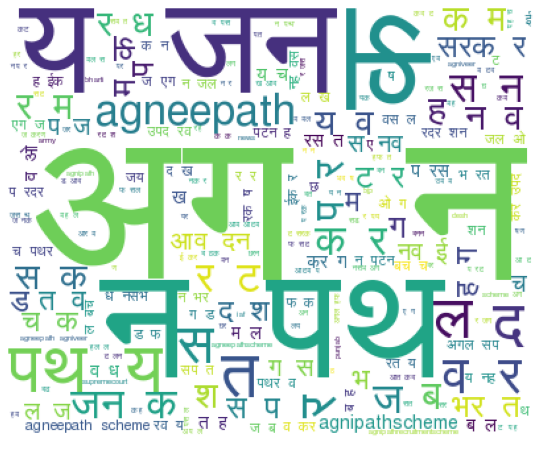

In [24]:
wordcloud = WordCloud(    font_path="C:/Users/nitin/Documents/DL/Devanagari/gargi.ttf",
                          stopwords="C:/Users/nitin/Documents/DL/stopwords2.txt",
                          background_color='white',
                          
                          width=400,
                          height=330
                         ).generate_from_text(bigstring)

plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(wordcloud)

In [25]:
## We are not getting good wordcloud of hindi tweets

In [26]:
# Adding Hindi fonts for plotting
import matplotlib
from matplotlib import font_manager

fe = font_manager.FontEntry(
    fname='C:/Users/nitin/Documents/DL/Devanagari/gargi.ttf',
    name='gargi'
)
font_manager.fontManager.ttflist.insert(0, fe)

### Top Hashtags

In [27]:
hashtags = df['tweet'].apply(lambda x: pd.value_counts(re.findall('(#\w+)', x.lower() )))\
                     .sum(axis=0)\
                     .to_frame()\
                     .reset_index()\
                     .sort_values(by=0,ascending=False)
hashtags.columns = ['hashtag','occurences']

In [28]:
hashtags.head(10)

,hashtag,occurences
1,#agneepath,51.0
9,#agnipathscheme,32.0
92,#अग,21.0
8,#agnipathrecruitmentscheme,13.0
3,#agneepathscheme,11.0
12,#agniveer,11.0
13,#agniveers,7.0
6,#agnipath,6.0
81,#supremecourt,6.0
75,#rojgarandolan,4.0


In [40]:
plt.rcParams['font.family'] = fe.name

In [30]:
# plt.rcParams['font.family'] = "sans-serif"

Text(0.5, 0.98, 'Top 10 Hashtags for keyword: AGNEEPATH')

<Figure size 1008x504 with 0 Axes>

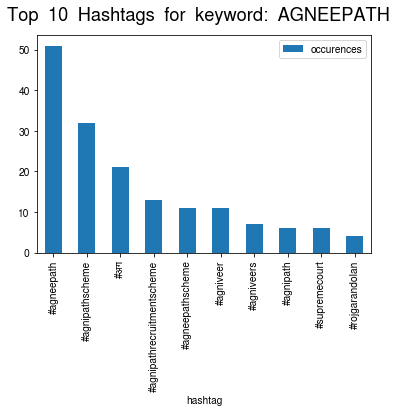

In [41]:
plt.figure(figsize=(14,7))
hashtags[:10].plot(kind='bar',y='occurences',x='hashtag')
plt.grid(False)
plt.suptitle('Top 10 Hashtags for keyword: AGNEEPATH', fontsize=18)

### Top mentioned users

In [42]:
top_mentioned_users = df['tweet'].str\
          .findall('(@[A-Za-z0-9]+)')\
          .apply(lambda x: pd.value_counts(x))\
          .sum(axis=0)\
          .sort_values(ascending=False)[:10]
top_mentioned_users

@narendramodi       7.0
@AamAadmiParty      5.0
@adgpi              5.0
@news24tvchannel    4.0
@AmitShah           4.0
@AAPUttarPradesh    4.0
@The                3.0
@ArvindKejriwal     3.0
@SrBachchan         3.0
@IAF                3.0
dtype: float64

Text(0.5, 0.98, 'Top 10 Users for keyword: AGNEEPATH')

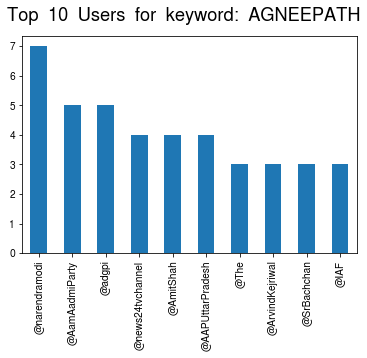

In [43]:
top_mentioned_users.plot(kind='bar')
plt.grid(False)
plt.suptitle('Top 10 Users for keyword: AGNEEPATH', fontsize=18)

### Most occuring words

In [44]:
words = df['processed_tweet'].dropna()\
                            .apply(lambda y: pd.value_counts(re.findall('([\s]\w+[\s])',' '.join(y))))\
                            .sum(axis=0)\
                            .to_frame()\
                            .reset_index()\
                            .sort_values(by=0,ascending=False)
words.columns = ['word','occurences']

In [45]:
words.head(10)

,word,occurences
30,agneepath,31.0
184,scheme,9.0
16,420,9.0
235,आम,7.0
99,iaf,6.0
259,बजट,5.0
255,नए,5.0
238,ओर,4.0
24,90,4.0
245,चलकर,4.0


Text(0.5, 0.98, 'Top 10 Words for keyword: AGNEEPATH')

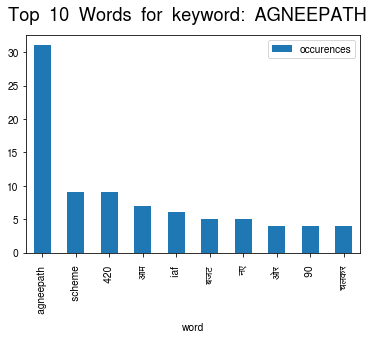

In [46]:
words[:10].plot(kind='bar',y='occurences',x='word')
plt.grid(False)
plt.suptitle('Top 10 Words for keyword: AGNEEPATH', fontsize=18)

### Most occuring bigram words

In [47]:
from nltk import bigrams
bigramseries = pd.Series([word for sublist in df['processed_tweet'].dropna()\
                    .apply(lambda x: [i for i in bigrams(x)])\
                    .tolist() for word in sublist])\
                    .value_counts()
bigramseries

(अग्निपथ, योजना)      148
(योजना, के)            91
(सुप्रीम, कोर्ट)       28
(के, विरोध)            27
(अग्निपथ, स्कीम)       24
                     ... 
(सरकार, निशाना,)        1
(निशाना,, अग्निपथ)      1
(स्कीम, बताया)          1
(बताया, गलत)            1
(जानें, किसने?)         1
Length: 3321, dtype: int64

In [38]:
bigramseries.head(10)

(अग्निपथ, योजना)      148
(योजना, के)            91
(सुप्रीम, कोर्ट)       28
(के, विरोध)            27
(अग्निपथ, स्कीम)       24
(वसूला, जाएगा)         20
(नहीं, वसूला)          19
(अगले, सप्ताह)         19
(सेना, भर्ती)          18
(उपद्रवियों, नहीं)     17
dtype: int64

Text(0.5, 0.98, 'Top 10 Bigrams for keyword: AGNEEPATH')

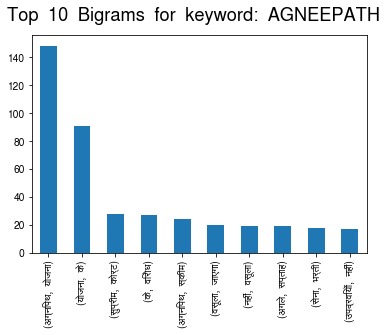

In [48]:
bigramseries[:10].plot(kind='bar')
plt.suptitle('Top 10 Bigrams for keyword: AGNEEPATH', fontsize=18)